In [1]:
import sys
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Add the project root directory to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.training import data_split_augment, train_model
from src.model import build_model

In [2]:
train_ds, val_ds = data_split_augment("../data/raw", (224,224), 16)

Found 360 files belonging to 9 classes.
Using 288 files for training.
Found 360 files belonging to 9 classes.
Using 72 files for validation.


In [3]:
model = build_model((224, 224), 9)

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 224, 224)

In [15]:
model.summary

<bound method Model.summary of <Sequential name=sequential_3, built=True>>

In [16]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30  
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.0878 - loss: 2.2455 - val_accuracy: 0.1944 - val_loss: 2.0767
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.1817 - loss: 2.0464 - val_accuracy: 0.2222 - val_loss: 2.0327
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.3204 - loss: 1.8843 - val_accuracy: 0.3611 - val_loss: 1.7955
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.4171 - loss: 1.5014 - val_accuracy: 0.3472 - val_loss: 1.7395
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.4787 - loss: 1.3901 - val_accuracy: 0.5139 - val_loss: 1.6061
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.5313 - loss: 1.2668 - val_accuracy: 0.5139 - val_loss: 1.4970
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - accuracy: 0.4696 - loss: 1.4773 - val_accuracy: 0.5000 - val_loss: 1.4742
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.5376 - loss: 1.1835 - val_accuracy: 0.

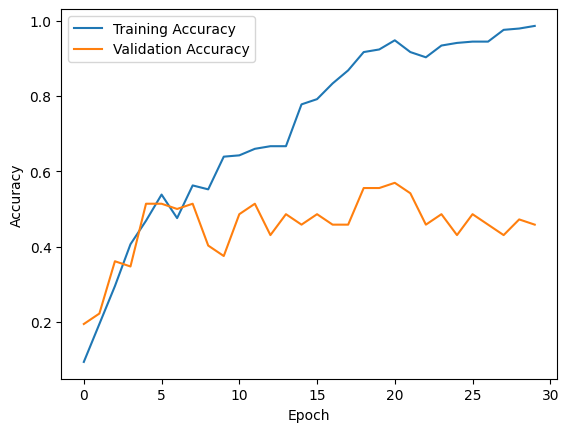

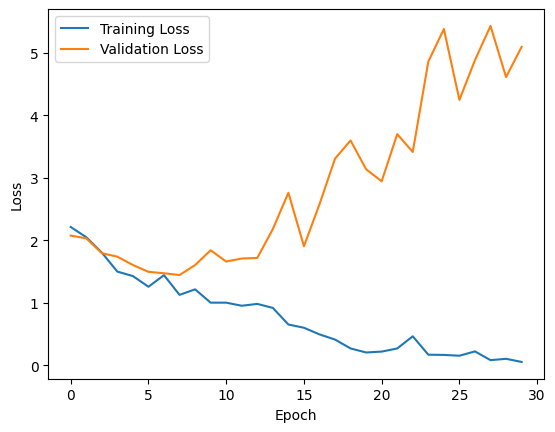

In [17]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model_regularization = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(.3),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(9, activation='softmax')  # 9 output classes for fruit categories
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model_regularization.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [19]:
history_reg = model_regularization.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30  
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 405ms/step - accuracy: 0.1181 - loss: 12.0417 - val_accuracy: 0.0417 - val_loss: 2.1892
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.1596 - loss: 2.1694 - val_accuracy: 0.1806 - val_loss: 2.1528
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 393ms/step - accuracy: 0.1087 - loss: 2.0715 - val_accuracy: 0.2361 - val_loss: 2.0066
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step - accuracy: 0.2211 - loss: 1.9549 - val_accuracy: 0.3333 - val_loss: 1.9106
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.3159 - loss: 1.8282 - val_accuracy: 0.3194 - val_loss: 1.8830
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 391ms/step - accuracy: 0.3832 - loss: 1.6265 - val_accuracy: 0.3333 - val_loss: 1.8513
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 378ms/step - accuracy: 0.5032 - loss: 1.3719 - val_accuracy: 0.3472 - val_loss: 1.8794
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.5917 - loss: 1.2317 - val_accuracy: 0

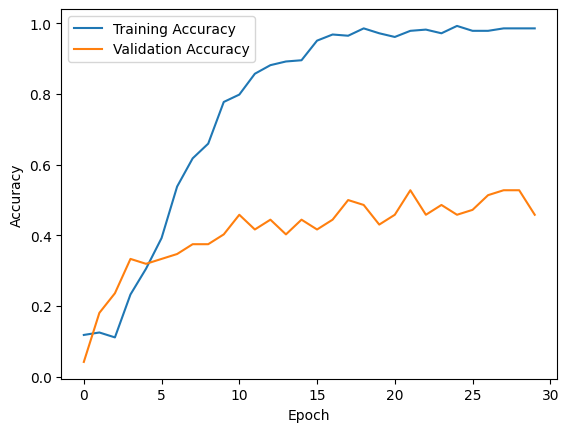

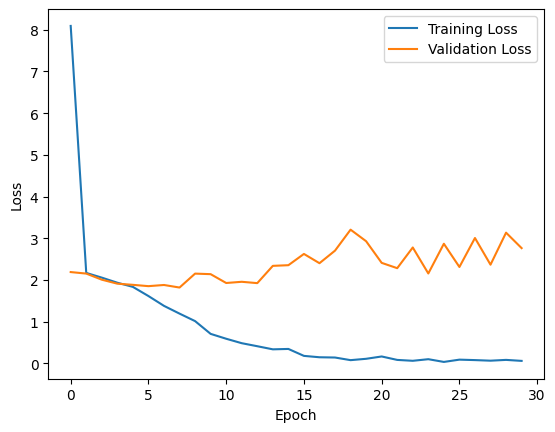

In [20]:
plt.plot(history_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_reg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

In [5]:
# Load the MobileNetV2 model with pretrained weights
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model to retain learned features

# Add custom layers on top
pre_trained_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),          # Pooling layer to reduce the feature maps
    Dense(128, activation='relu'),     # Custom dense layer
    Dropout(0.5),                      # Dropout layer to prevent overfitting
    Dense(9, activation='softmax')  # Output layer with softmax for classification
])

pre_trained_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
history_preTrained = pre_trained_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.1249 - loss: 2.8158 - val_accuracy: 0.2222 - val_loss: 1.9405
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.1764 - loss: 2.1958 - val_accuracy: 0.4167 - val_loss: 1.7149
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.3998 - loss: 1.7704 - val_accuracy: 0.5417 - val_loss: 1.5393
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.4739 - loss: 1.5770 - val_accuracy: 0.6389 - val_loss: 1.3688
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.5670 - loss: 1.2976 - val_accuracy: 0.7361 - val_loss: 1.2208
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.6366 - loss: 1.1551 - val_accuracy: 0.7361 - val_loss: 1.0881
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.7146 - loss: 1.0194 - val_accuracy: 0.7917 - val_loss: 0.9778
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.7263 - loss: 0.8864 - val_accuracy: 0.

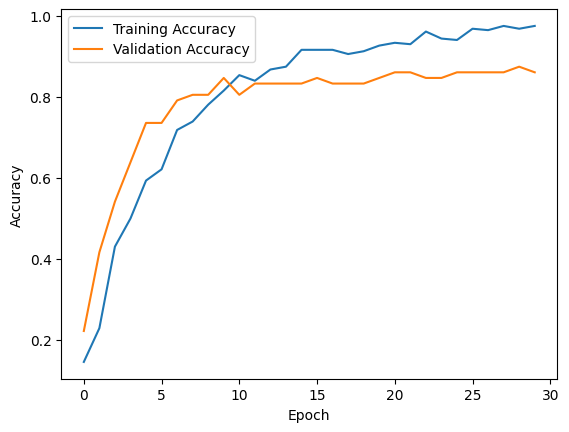

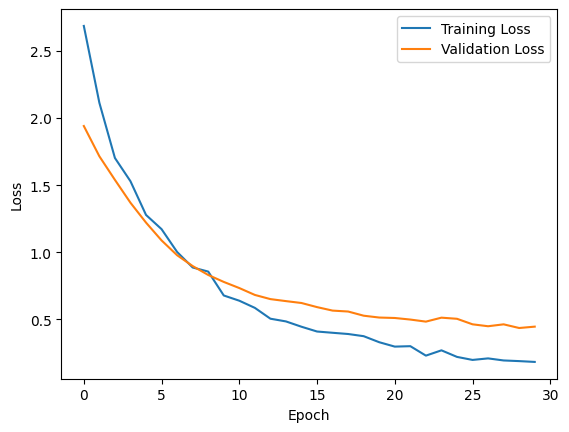

In [7]:
plt.plot(history_preTrained.history['accuracy'], label='Training Accuracy')
plt.plot(history_preTrained.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_preTrained.history['loss'], label='Training Loss')
plt.plot(history_preTrained.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
import numpy as np
from PIL import Image

In [9]:
def load_and_preprocess_image(image_path, img_size=(224, 224)):
    """
    Loads and preprocesses an image to match the model's expected input format.
    """
    img = Image.open(image_path).convert("RGB")  # Ensure RGB format
    img = img.resize(img_size)  # Resize to model's input size
    img_array = np.array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess for MobileNetV2
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

def predict_on_directory(model, directory, img_size=(224, 224)):
    """
    Loads images from a directory, preprocesses them, and makes predictions using the model.
    """
    plt.figure(figsize=(15, 15))
    images = [f for f in os.listdir(directory) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    for i, image_file in enumerate(images[:9]):  # Limit to 9 images for display purposes
        image_path = os.path.join(directory, image_file)
        preprocessed_image = load_and_preprocess_image(image_path, img_size)
        
        # Make predictions
        predictions = model.predict(preprocessed_image)
        predicted_class = np.argmax(predictions)
        confidence = np.max(predictions)  # Get the confidence score for the predicted class

        # Display the image with its predicted label and confidence
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Class {predicted_class}, Confidence: {confidence:.2f}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


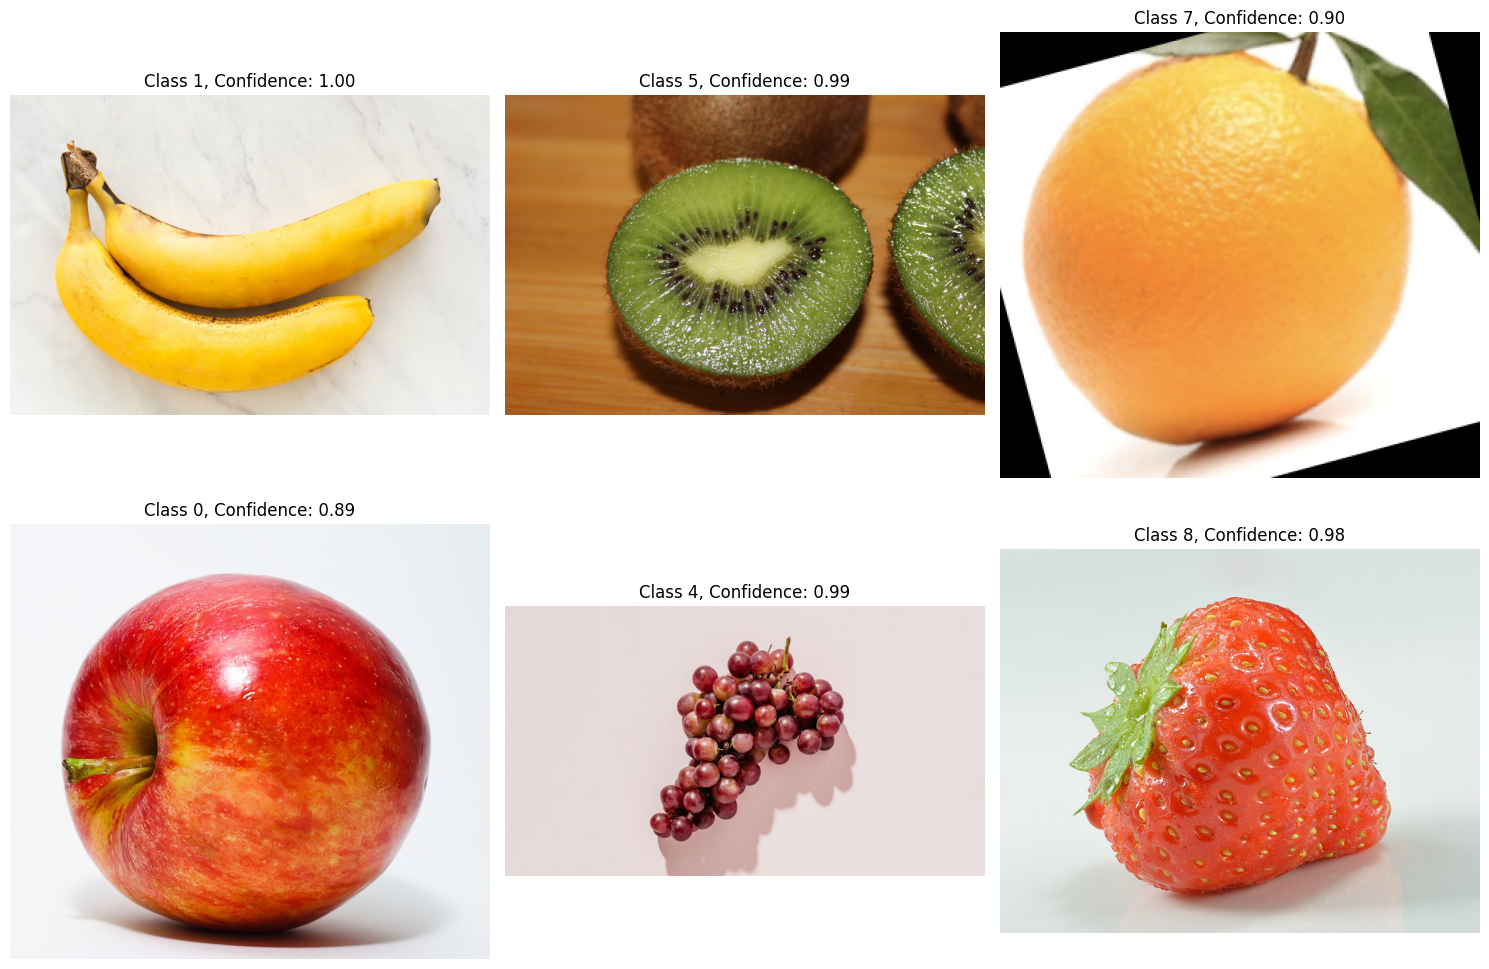

In [10]:
test_directory = '../data/test/'  # Replace with the path to your test images directory
predict_on_directory(pre_trained_model, test_directory)

In [11]:
def load_and_preprocess_image(image_path, img_size=(224, 224)):
    """
    Loads and preprocesses an image to match the model's expected input format.
    """
    img = Image.open(image_path).convert("RGB")  # Ensure RGB format
    img = img.resize(img_size)  # Resize to model's input size
    img_array = np.array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess for MobileNetV2
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

def predict_on_directory(model, class_names, directory, img_size=(224, 224)):
    """
    Loads images from a directory, preprocesses them, and makes predictions using the model.
    """
    plt.figure(figsize=(15, 15))
    images = [f for f in os.listdir(directory) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    for i, image_file in enumerate(images[:9]):  # Limit to 9 images for display purposes
        image_path = os.path.join(directory, image_file)
        preprocessed_image = load_and_preprocess_image(image_path, img_size)
        
        # Make predictions
        predictions = model.predict(preprocessed_image)
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]  # Map index to class name
        confidence = np.max(predictions)  # Get the confidence score for the predicted class

        # Display the image with its predicted label and confidence
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{predicted_class}, Confidence: {confidence:.2f}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

In [12]:
# Get the class names from the subdirectory names
class_names = sorted([entry.name for entry in os.scandir("../data/raw") if entry.is_dir()])
print("Class names:", class_names)

Class names: ['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


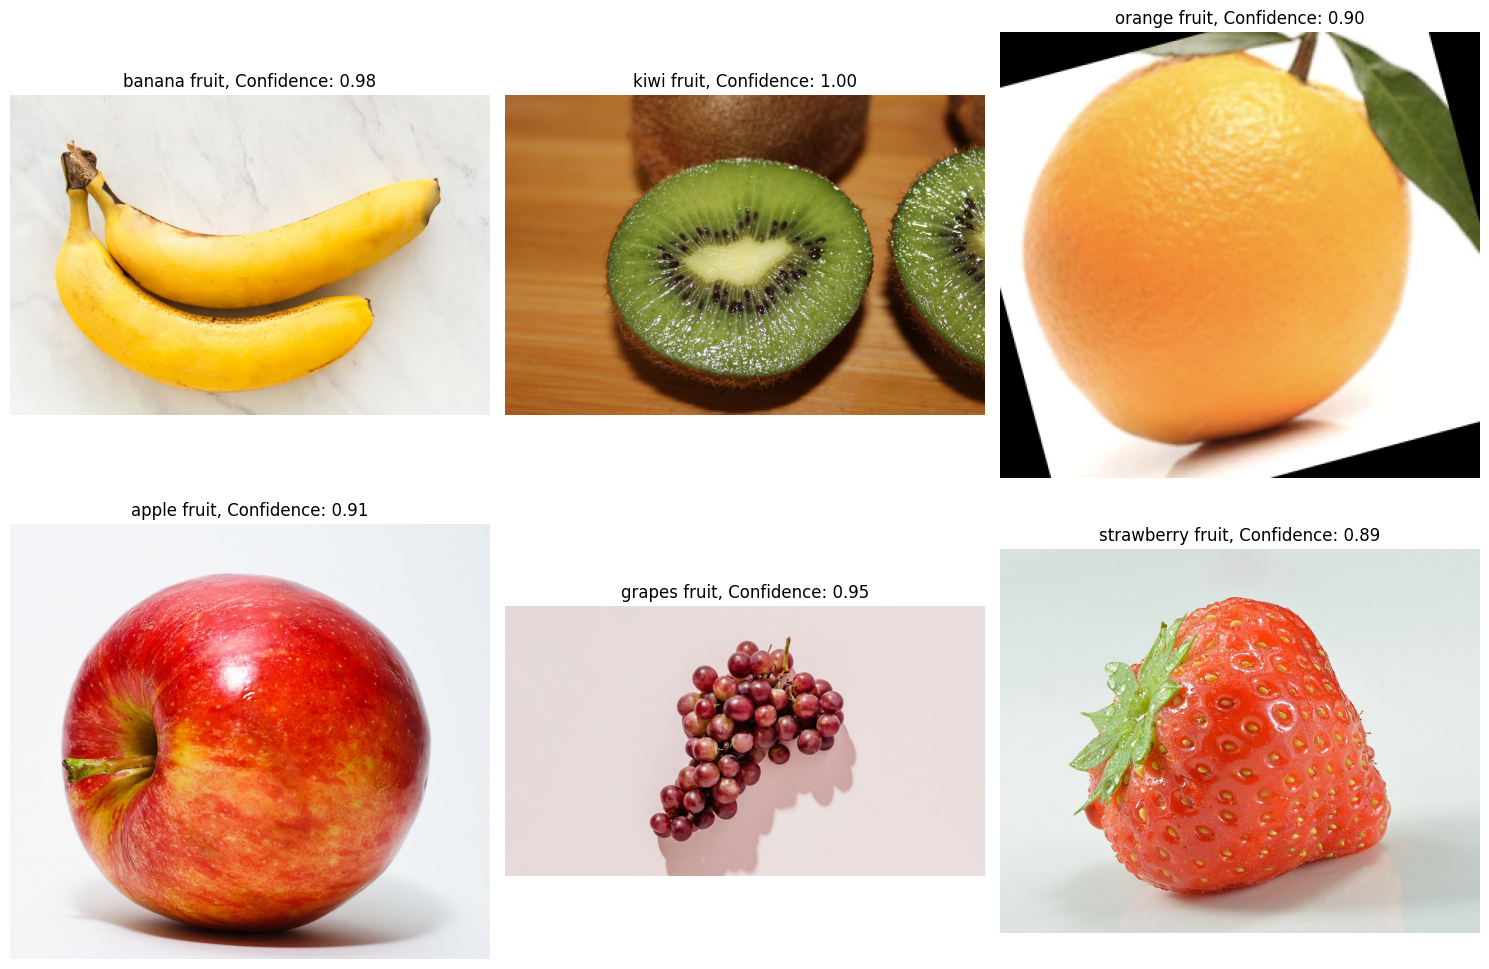

In [39]:
test_directory = '../data/test'    # Replace with the path to your test images directory

predict_on_directory(pre_trained_model, class_names, test_directory)


In [13]:
import os
MODELS_DIR = '../models'
os.makedirs(MODELS_DIR, exist_ok=True)
models = [m for m in os.listdir(MODELS_DIR) if m.startswith("modelV") and m.endswith(".keras")]
versions = [int(f[6:-6]) for f in models if f[6:-6].isdigit()]
next = max(versions, default=0) + 1
save_dest = os.path.join(MODELS_DIR, f"modelV{next}.keras")
pre_trained_model.save(save_dest)
print("Model successful trained and saved")

Model successful trained and saved


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


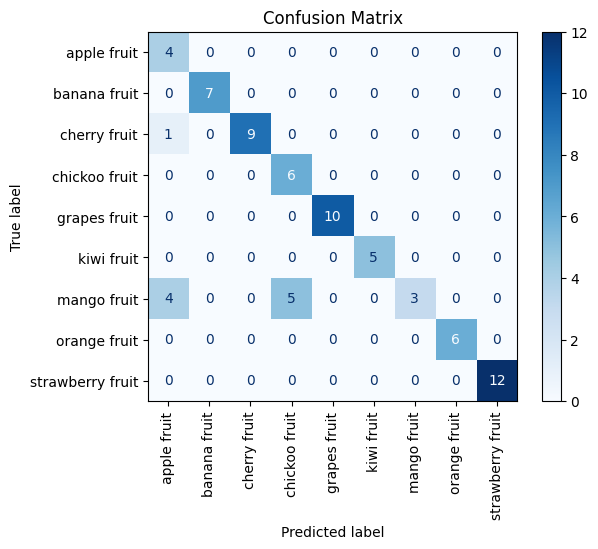

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def plot_confusion_matrix(model, test_ds):
    # Extract true labels and predictions
    y_true = np.concatenate([y for _, y in test_ds], axis=0)
    y_pred = np.argmax(model.predict(test_ds), axis=1)
    y_true = np.argmax(y_true, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    
    # Plot the confusion matrix
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title("Confusion Matrix")
    plt.show()

# Assuming `test_ds` is your test dataset and `model` is your trained model
plot_confusion_matrix(pre_trained_model, val_ds)


In [16]:
def visualize_feature_maps(model, img_array, layer_name):
    layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    feature_maps = layer_model.predict(img_array)

    # Visualize the first 16 feature maps
    plt.figure(figsize=(15, 15))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis("off")
    plt.show()

In [17]:
image_path = "../data/test/red_apple.jpg"
img_arr = load_and_preprocess_image(image_path)

In [18]:
for layer in pre_trained_model.layers:
    print(layer.name)

mobilenetv2_1.00_224
global_average_pooling2d
dense_2
dropout_1
dense_3


In [29]:
# Create a model to output feature maps from the base model (mobilenetv2_1.00_224)
intermediate_model = tf.keras.Model(
    inputs=pre_trained_model.input,
    outputs=pre_trained_model.get_layer("mobilenetv2_1.00_224").output
)
# Get feature maps
feature_maps = intermediate_model.predict(img_arr)


AttributeError: The layer sequential_2 has never been called and thus has no defined input.

In [28]:
# Define dummy input
dummy_input = tf.zeros((1, 224, 224, 3))  # A batch size of 1, with image dimensions 224x224x3
pre_trained_model(dummy_input)  # Call the model

# Access attributes
print(pre_trained_model.input_shape)
print(pre_trained_model.output_shape)


(None, 224, 224, 3)
(None, 9)


In [30]:
intermediate_model = tf.keras.Model(
    inputs=pre_trained_model.input,
    outputs=pre_trained_model.get_layer("mobilenetv2_1.00_224").output
)

AttributeError: The layer sequential_2 has never been called and thus has no defined input.

In [31]:
pre_trained_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753,373 (10.50 MB)

 Trainable params: 165,129 (645.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 330,260 (1.26 MB)

In [32]:
pre_trained_model(dummy_input)

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[0.03103812, 0.26921567, 0.01849689, 0.03201947, 0.58220947,
        0.04268537, 0.00115129, 0.01984666, 0.00333702]], dtype=float32)>

In [35]:
intermediate_model = tf.keras.Model(inputs=base_model.input, outputs=base_model.output)
feature_maps = intermediate_model(dummy_input)

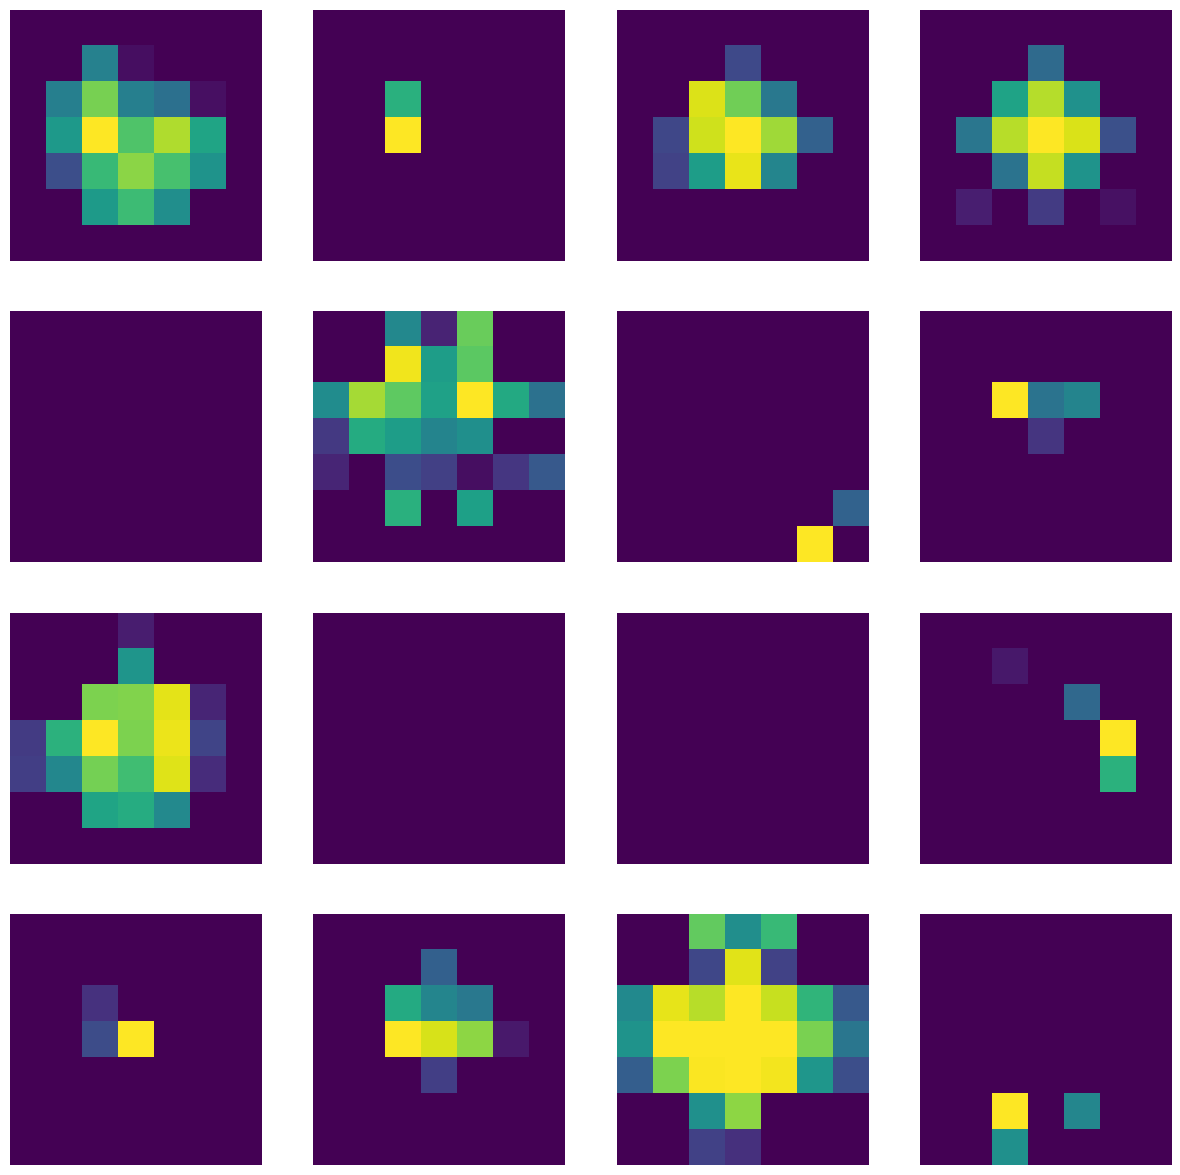

In [36]:
def visualize_feature_maps(feature_maps):
    num_filters = feature_maps.shape[-1]
    plt.figure(figsize=(15, 15))
    for i in range(min(num_filters, 16)):  # Display up to 16 feature maps
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis("off")
    plt.show()

visualize_feature_maps(feature_maps)

In [37]:
def get_feature_maps(model, layer_name, preprocessed_image):
    """
    Extracts feature maps from a specific layer for the given image.
    Args:
        model: Trained Keras model.
        layer_name: Name of the layer to visualize.
        preprocessed_image: Preprocessed image tensor.
    Returns:
        Feature map tensor.
    """
    # Create a sub-model for the specific layer
    intermediate_model = tf.keras.Model(
        inputs=model.input,
        outputs=model.get_layer(layer_name).output
    )
    
    # Get the feature maps
    feature_maps = intermediate_model.predict(preprocessed_image)
    return feature_maps


In [40]:
for layer in pre_trained_model.get_layer('mobilenetv2_1.00_224').layers:
    print(layer.name)

input_layer_2
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_

In [60]:
layer_name = "Conv1"
# feature_maps = get_feature_maps(pre_trained_model, layer_name, img_arr)

intermediate_model = tf.keras.Model(
    inputs=pre_trained_model.get_layer("mobilenetv2_1.00_224").input,  # Input tensor from the base model
    outputs=pre_trained_model.get_layer("mobilenetv2_1.00_224").get_layer(layer_name).output
)

feature_maps = intermediate_model.predict(img_arr)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


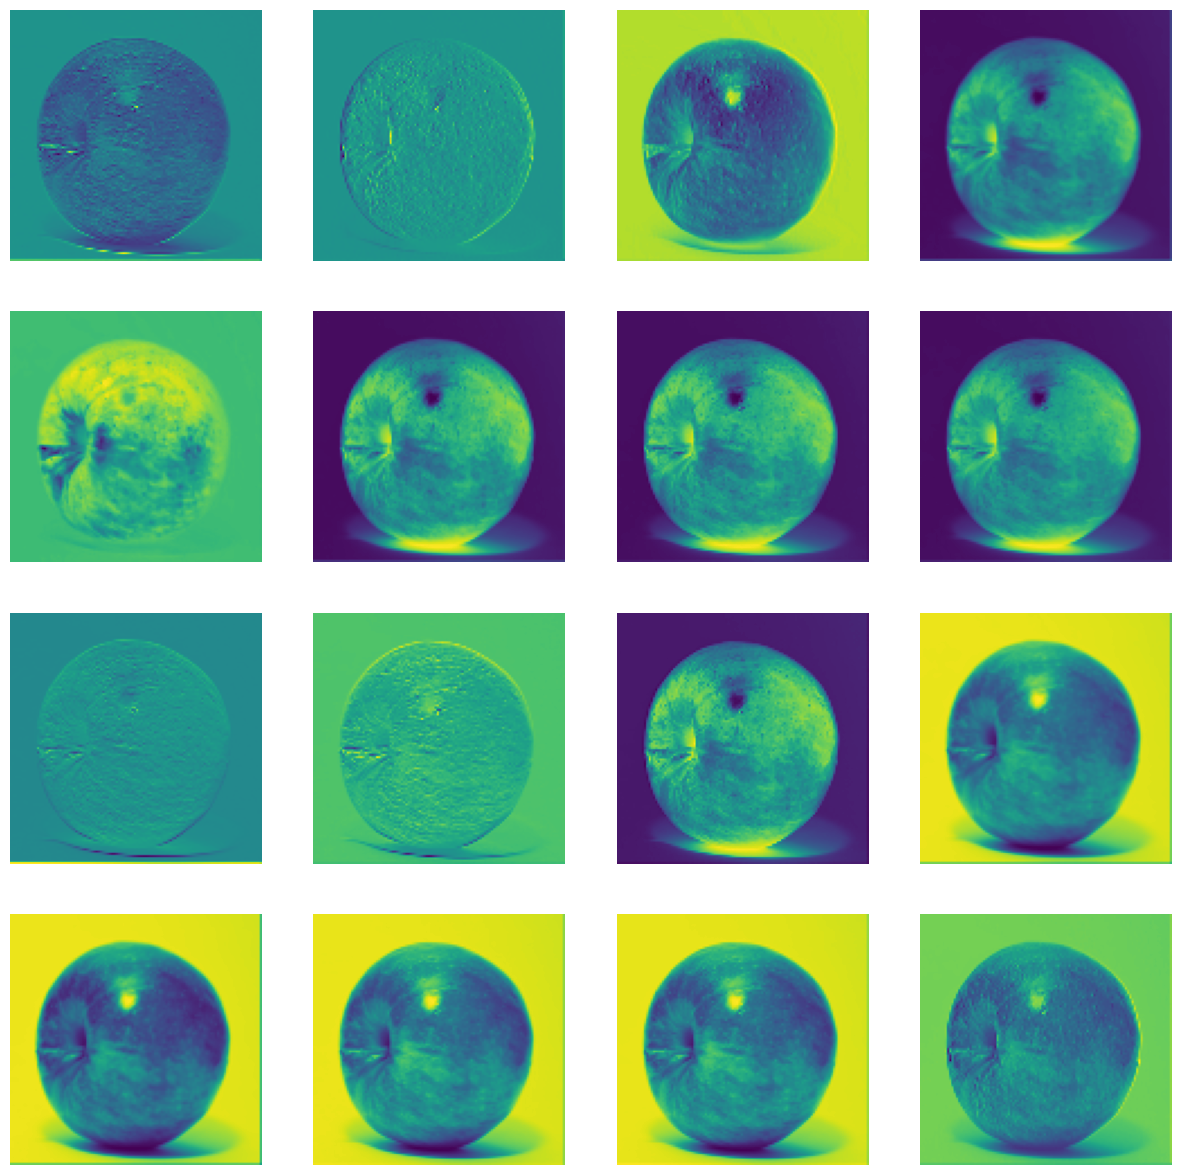

In [61]:
visualize_feature_maps(feature_maps)